C:\Users\kduru\AppData\Local\Temp\ipykernel_18540\1979802053.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


XGBoost Model - MSE: 5961183012.3641, RMSE: 77208.6978, MAE: 55717.8596, R2: 0.7564


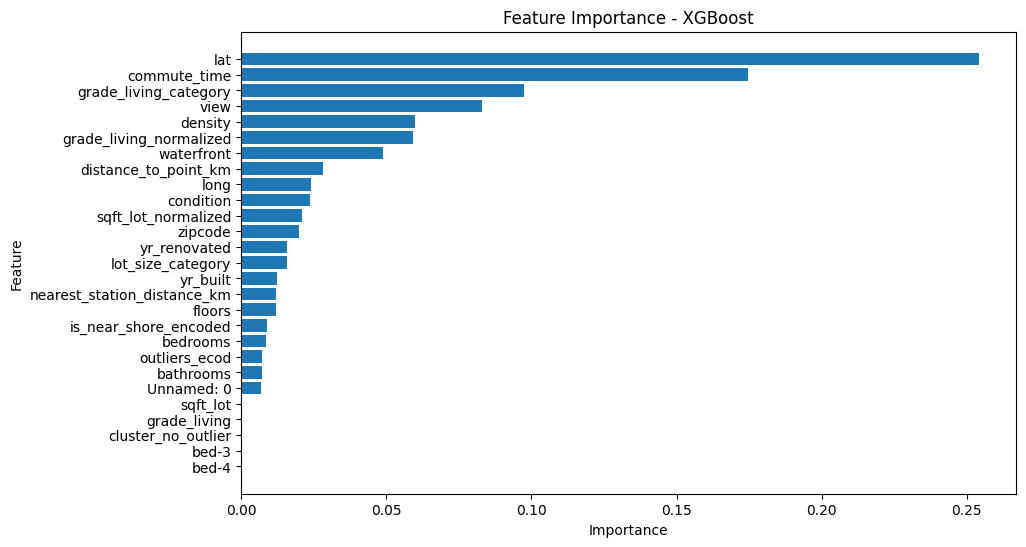

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Data preparation
data = pd.read_csv('./regression_1.csv')  # Dosya yolunu güncelleyin
data_model = data.copy()
data_model["bed-3"] = data_model["bedrooms_cat_<3"]
data_model["bed-4"] = data_model["bedrooms_cat_>4"]
data_model = data_model.drop(["bedrooms_cat_<3", "bedrooms_cat_>4"], axis=1)

# Splitting data into features and target variable
X = data_model.drop('price', axis=1)
y = data_model['price']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Model Training
xgb_model = XGBRegressor(n_estimators=200, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Model - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Feature importance
importance = xgb_model.feature_importances_
features = X.columns

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.show()
